<a href="https://colab.research.google.com/github/printmatt/Airbnb-Data-Project/blob/main/AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# AirBnb Capstone

#[Project Slides](https://docs.google.com/presentation/d/1mSQ1cv1upAy8ourUHRXVJ1HTlRMrOWGHRLCBgRXpJFo/edit?usp=sharing)



# Import and clean up data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# Combine 4 datasets of each quarter Winter - Fall 2022
url_sept_to_dec_2021 = 'https://raw.githubusercontent.com/printmatt/Airbnb-Data-Project/main/sept-dec2021.csv'
url_dec_to_march_2022 = 'https://raw.githubusercontent.com/printmatt/Airbnb-Data-Project/main/dec-march2022.csv'
url_march_to_june_2022 = 'https://raw.githubusercontent.com/printmatt/Airbnb-Data-Project/main/march-june2022.csv'
url_june_to_sept_2022 = 'https://raw.githubusercontent.com/printmatt/Airbnb-Data-Project/main/listings.csv'

raw_df=pd.concat(
    [pd.read_csv(url_sept_to_dec_2021).set_index('id'),
     pd.read_csv(url_dec_to_march_2022).set_index('id'),
     pd.read_csv(url_march_to_june_2022).set_index('id'),
     pd.read_csv(url_june_to_sept_2022).set_index('id')]
).drop_duplicates()
raw_df.columns = (raw_df.columns.str.strip().str.replace('(', '').str.replace(')', ''))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-2-287c0032db57>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw_df.columns = (raw_df.columns.str.strip().str.replace('(', '').str.replace(')', ''))


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132126 entries, 2595 to 48971505
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            132103 non-null  object 
 1   host_id                         132126 non-null  int64  
 2   host_name                       131913 non-null  object 
 3   neighbourhood_group             132126 non-null  object 
 4   neighbourhood                   132126 non-null  object 
 5   latitude                        132126 non-null  float64
 6   longitude                       132126 non-null  float64
 7   room_type                       132126 non-null  object 
 8   price                           132126 non-null  int64  
 9   minimum_nights                  132126 non-null  int64  
 10  number_of_reviews               132126 non-null  int64  
 11  last_review                     107706 non-null  object 
 12  reviews_per

## Trim outliers

In [ ]:
# Trim outliers
price_lo = raw_df["price"].quantile(0.05)
price_hi  = raw_df["price"].quantile(0.95)
raw_df = raw_df[(raw_df["price"] < price_hi) & (raw_df["price"] > price_lo)]

## Need more cleaning here (Cameron)

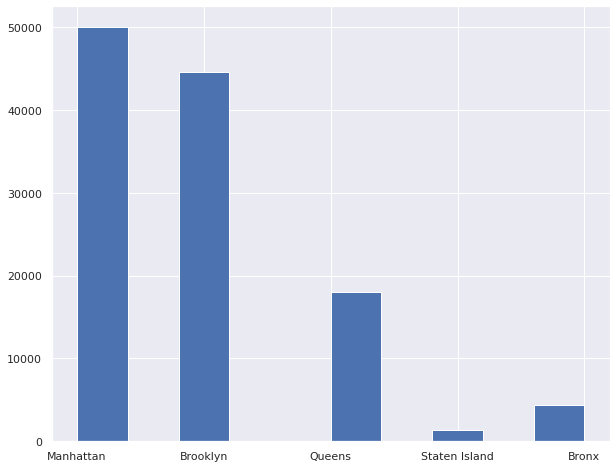

In [ ]:
raw_df['neighbourhood_group'].hist()

(array([83817., 13199.,  6662.,  4202.,  2879.,  1984.,  1514.,  1012.,
          750.,  2297.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Patch objects>)

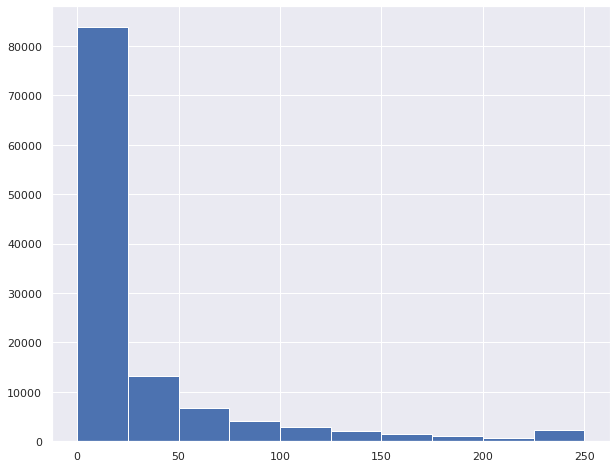

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# trim the reviews to no more than 250 (over that can be considered outliers for this purpose and we can clip it as such)

def cutTo(iterable_to_cut, limit):
  for item in iterable_to_cut:
    if item > limit:
      item = limit

raw_df['number_of_reviews'].clip(upper=250, lower=0, inplace=True)
plt.hist(raw_df['number_of_reviews'], range=(0, 250))

# Exploration with Pandas and linear regression

## Interesting details from this dataset: i.e.


1.   Top 10 most expensive neighborhoods in NYC (to rent an Airbnb)
2.   Top 10 most affordable neighborhoods
3.   Average Airbnb cost across NYC


In [ ]:
raw_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
# 1a. Group the listings by their neighbourhood and room type to observe the average pricing
pricing_by_neighbourhood = raw_df[['neighbourhood','neighbourhood_group','price','room_type','minimum_nights']].groupby(['neighbourhood','neighbourhood_group','room_type'], as_index=False).mean()

# 1b. Sort the average pricing for each room type. Note that the price in this data includes the different minimum
sorted_pricing = pricing_by_neighbourhood.sort_values('price')

private_room_ranking = sorted_pricing.loc[sorted_pricing['room_type'] == 'Private room']
entire_apt_ranking = sorted_pricing.loc[sorted_pricing['room_type'] == 'Entire home/apt']
shared_room_ranking = sorted_pricing.loc[sorted_pricing['room_type'] == 'Shared room']
hotel_room_ranking = sorted_pricing.loc[sorted_pricing['room_type'] == 'Hotel room']

# 1c. Find the top 10 most expensive
private_room_ranking.tail(10).sort_values('price',ascending=False)
entire_apt_ranking.tail(10).sort_values('price',ascending=False)
shared_room_ranking.tail(10).sort_values('price',ascending=False)
hotel_room_ranking.tail(10).sort_values('price',ascending=False)

# 2. Find the top 10 cheapest
private_room_ranking.head(10)
entire_apt_ranking.head(10)
shared_room_ranking.head(10)
hotel_room_ranking.head(10)

entire_apt_ranking.head(10)


,neighbourhood,neighbourhood_group,room_type,price,minimum_nights
67,Bull's Head,Staten Island,Entire home/apt,60.000000,30.000000
89,"Chelsea, Staten Island",Staten Island,Entire home/apt,87.333333,18.333333
341,Mariners Harbor,Staten Island,Entire home/apt,88.346154,12.230769
232,Glen Oaks,Queens,Entire home/apt,89.000000,1.000000
447,Richmondtown,Staten Island,Entire home/apt,92.000000,3.000000
466,Rossville,Staten Island,Entire home/apt,95.000000,30.000000
108,Co-op City,Bronx,Entire home/apt,95.000000,3.000000
242,Graniteville,Staten Island,Entire home/apt,97.666667,46.000000
130,Country Club,Bronx,Entire home/apt,98.000000,4.000000
285,Hunts Point,Bronx,Entire home/apt,100.095238,9.761905


In [ ]:
entire_apt_ranking.tail(10).sort_values('price',ascending=False)


,neighbourhood,neighbourhood_group,room_type,price,minimum_nights
527,Tribeca,Manhattan,Entire home/apt,315.930380,27.047468
574,Willowbrook,Staten Island,Entire home/apt,315.666667,4.000000
56,Broad Channel,Queens,Entire home/apt,305.000000,3.000000
431,Prospect Park,Brooklyn,Entire home/apt,271.000000,15.545455
512,Theater District,Manhattan,Entire home/apt,267.620499,27.069252
383,Neponsit,Queens,Entire home/apt,267.000000,1.857143
191,Financial District,Manhattan,Entire home/apt,254.186461,28.019002
391,NoHo,Manhattan,Entire home/apt,254.166667,21.366667
420,Pelham Islands,Bronx,Entire home/apt,250.000000,3.000000
96,Civic Center,Manhattan,Entire home/apt,242.327273,28.363636


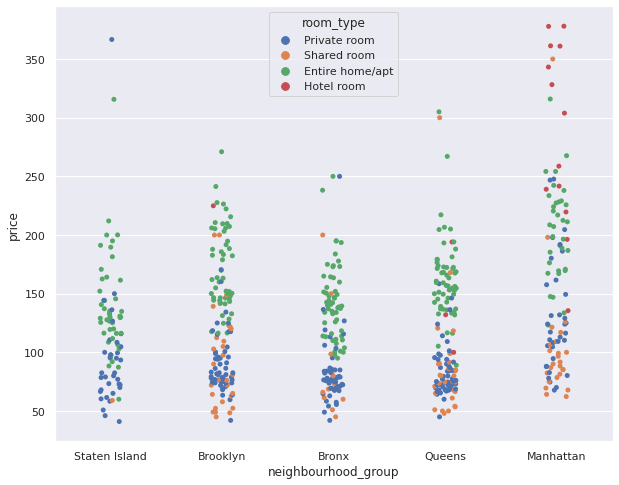

In [ ]:
# Price distribution accross neighbourhood groups
graph = sns.stripplot(data=sorted_pricing, x="neighbourhood_group", y="price", hue="room_type")


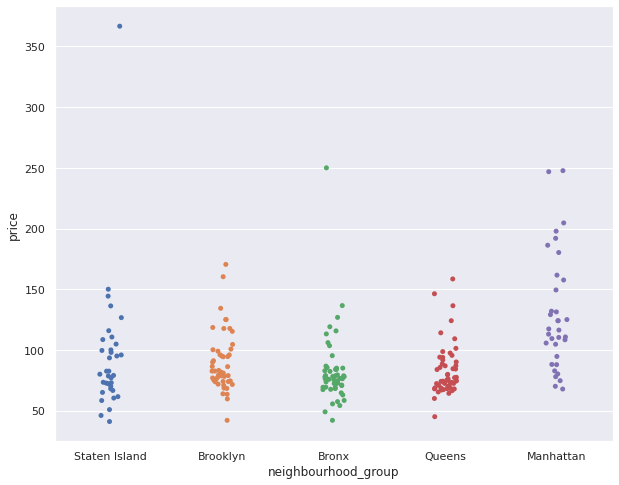

In [ ]:
# Private room price distribution accross neighbourhood groups
graph = sns.stripplot(data=private_room_ranking, x="neighbourhood_group", y="price")


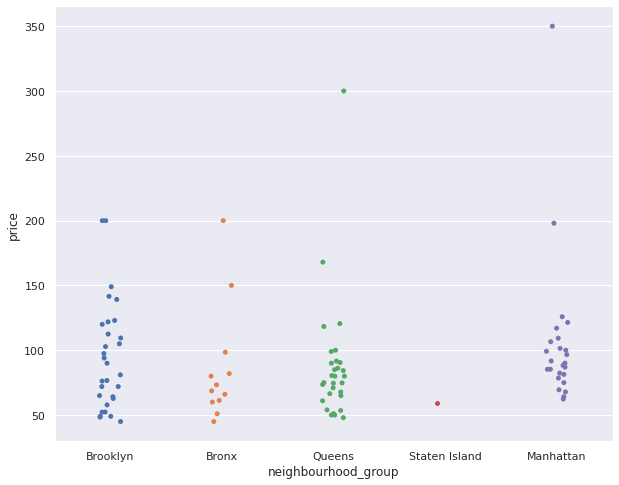

In [ ]:
# Shared room price distribution accross neighbourhood groups
graph = sns.stripplot(data=shared_room_ranking, x="neighbourhood_group", y="price")


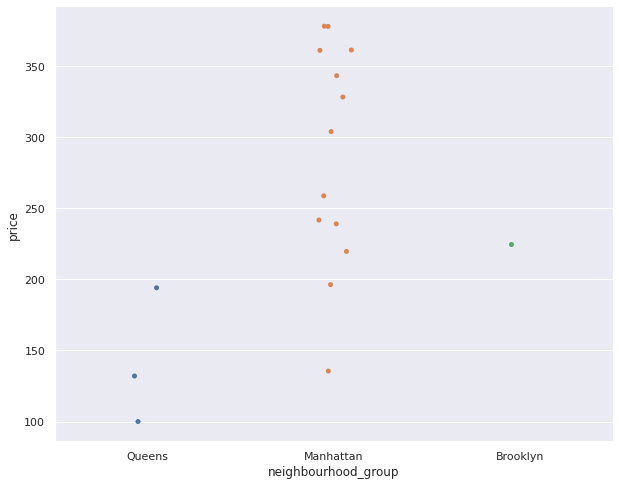

In [ ]:
# Hotel room price distribution accross neighbourhood groups
graph = sns.stripplot(data=hotel_room_ranking, x="neighbourhood_group", y="price")


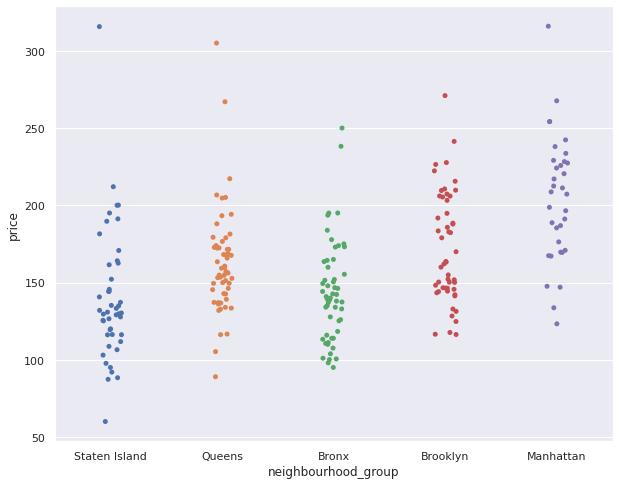

In [ ]:
# Entire place price distribution accross neighbourhood groups
ax = sns.stripplot(data=entire_apt_ranking, x="neighbourhood_group", y="price")


In [ ]:
# 3. Listing average prices accross NYC
private_room_avg = pd.DataFrame(np.array([private_room_ranking.mean()]), columns = ['price','min_nights'])
private_room_avg['room_type'] = 'private room'
entire_apt_avg = pd.DataFrame(np.array([entire_apt_ranking.mean()]), columns = ['price','min_nights'])
entire_apt_avg['room_type'] = 'entire home/apt'
shared_room_avg = pd.DataFrame(np.array([shared_room_ranking.mean()]), columns = ['price','min_nights'])
shared_room_avg['room_type'] = 'shared room'
hotel_room_avg = pd.DataFrame(np.array([hotel_room_ranking.mean()]), columns = ['price','min_nights'])
hotel_room_avg['room_type'] = 'hotel room'

avg_prices = pd.concat([private_room_avg, entire_apt_avg, shared_room_avg, hotel_room_avg]).set_index('room_type')
avg_prices

<ipython-input-14-b41397127c19>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  private_room_avg = pd.DataFrame(np.array([private_room_ranking.mean()]), columns = ['price','min_nights'])
<ipython-input-14-b41397127c19>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  entire_apt_avg = pd.DataFrame(np.array([entire_apt_ranking.mean()]), columns = ['price','min_nights'])
<ipython-input-14-b41397127c19>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  shared_room_avg = pd.DataFrame(np.arr

,price,min_nights
room_type,,
private room,92.984709,14.488394
entire home/apt,161.878595,14.570426
shared room,93.554047,15.382288
hotel room,258.533901,7.047083


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118316 entries, 2595 to 698195550745703156
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   name                            118300 non-null  object 
 1   host_id                         118316 non-null  int64  
 2   host_name                       118192 non-null  object 
 3   neighbourhood_group             118316 non-null  object 
 4   neighbourhood                   118316 non-null  object 
 5   latitude                        118316 non-null  float64
 6   longitude                       118316 non-null  float64
 7   room_type                       118316 non-null  object 
 8   price                           118316 non-null  int64  
 9   minimum_nights                  118316 non-null  int64  
 10  number_of_reviews               118316 non-null  int64  
 11  last_review                     98712 non-null   object 
 12  r

In [ ]:
raw_df.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## Predicting the price via linear regression model

### Our first linear regression model wasn't successful because we were missing many features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def linear_regression_model_by_room_type(df):
  X_train, X_test, y_train, y_test = train_test_split(df.loc[:,['latitude','longitude']],df['price'], test_size=0.3, random_state=0)
  reg = LinearRegression().fit(X_train, y_train)
  print(f'Training score is: {reg.score(X_train, y_train) * 100:.2f} %')
  print(f'Testing score is: {reg.score(X_test, y_test) * 100:.2f} %')
  return reg

linear_regression_model_by_room_type(raw_df.loc[raw_df['room_type'] == 'Private room',:])
linear_regression_model_by_room_type(raw_df.loc[raw_df['room_type'] == 'Entire home/apt',:])
linear_regression_model_by_room_type(raw_df.loc[raw_df['room_type'] == 'Shared room',:])
linear_regression_model_by_room_type(raw_df.loc[raw_df['room_type'] == 'Hotel room',:])

Training score is: 6.84 %
Testing score is: 6.50 %
Training score is: 3.52 %
Testing score is: 3.26 %
Training score is: 0.83 %
Testing score is: 1.87 %
Training score is: 7.36 %
Testing score is: 4.20 %


LinearRegression()

In [ ]:
# After standardizing the model is still very inaccurate. 
raw_df_lr=raw_df.loc[:,['latitude','longitude','price']]
raw_df_lr=raw_df_lr.dropna()
raw_df_lr_std = raw_df_lr.copy()
raw_df_lr_std -= raw_df_lr_std.mean()
raw_df_lr_std /= raw_df_lr_std.std()
raw_df_lr_std.describe()
linear_regression_model_by_room_type(raw_df_lr_std)

Training score is: 5.40 %
Testing score is: 5.36 %


LinearRegression()

## Another attempt using a bigger dataset with many more features.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## WE SHOULD USE THIS DATASET INSTEAD FOR MODEL
decompressed_df = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/listings.csv.gz')
bad_cols = ['id','listing_url','scrape_id','last_scraped','source','host_id',
            'host_url','host_name','host_thumbnail_url','host_picture_url',
            'host_neighbourhood','host_listings_count','host_total_listings_count',
            'calendar_updated']
decompressed_df = decompressed_df.drop(bad_cols,axis=1)
decompressed_df.info()




/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          39868 non-null  object 
 1   description                                   39036 non-null  object 
 2   neighborhood_overview                         23466 non-null  object 
 3   picture_url                                   39881 non-null  object 
 4   host_since                                    39831 non-null  object 
 5   host_location                                 32998 non-null  object 
 6   host_about                                    22509 non-null  object 
 7   host_response_time                            26333 non-null  object 
 8   host_response_rate                            26333 non-null  object 
 9   host_acceptance_rate                          28020 non-null 

###Clean up bathrooms text

In [ ]:
# Clean up bathrooms feature.
def extract_bathrooms(text):
  if not isinstance(text, str):
    return 0
  number_of_bathrooms = text.split(' ')[0]
  try:
    value = float(number_of_bathrooms)
    return value
  except:
    return 0


In [ ]:
decompressed_df['bathrooms'] = decompressed_df['bathrooms_text'].apply(extract_bathrooms)
decompressed_df['bathrooms']

0        1.0
1        1.0
2        0.0
3        2.5
4        1.5
        ... 
39876    1.0
39877    1.0
39878    1.0
39879    2.0
39880    1.0
Name: bathrooms, Length: 39881, dtype: float64

### Clean up dollars value

In [ ]:
def convertMoneyToFloat(s):
  if type(s)==str:
    return float(s.split()[0].replace(',','')[1:])


In [ ]:
decompressed_df['price'] = decompressed_df['price'].apply(convertMoneyToFloat)

### Find correlations

In [ ]:
decompressed_df.corr()['price'].sort_values().tail(5).index

Index(['beds', 'bathrooms', 'bedrooms', 'accommodates', 'price'], dtype='object')

In [ ]:
feature_names = ['bathrooms', 'beds', 'bedrooms', 'accommodates']

In [ ]:
def count_amenities(amenities):
  return len(amenities.replace('[','').replace('"','').split(','))



### Standardization

In [ ]:
price_prediction_df = decompressed_df.loc[:,feature_names]
price_prediction_df = price_prediction_df.fillna(0.0)
price_prediction_df -= price_prediction_df.mean()
price_prediction_df /= price_prediction_df.std()
price_prediction_df=np.clip(price_prediction_df,-3,3)

In [ ]:
price_prediction_df

,bathrooms,beds,bedrooms,accommodates
0,-0.350504,-0.534268,-0.290787,-0.467141
1,-0.350504,-0.534268,-1.538567,-0.968071
2,-2.568249,-0.534268,-0.290787,-0.467141
3,2.976113,3.000000,3.000000,3.000000
4,0.758369,0.348966,0.956993,0.534718
...,...,...,...,...
39876,-0.350504,-0.534268,-0.290787,-0.467141
39877,-0.350504,0.348966,-0.290787,0.534718
39878,-0.350504,0.348966,-0.290787,-0.467141
39879,1.867241,0.348966,0.956993,0.534718


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(price_prediction_df.loc[:,feature_names],decompressed_df.loc[:,'price'], test_size=0.3, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
print(f'Training score is: {reg.score(X_train, y_train) * 100:.2f} %')
print(f'Testing score is: {reg.score(X_test, y_test) * 100:.2f} %')

Training score is: 8.53 %
Testing score is: 16.60 %


Though the model improved a little bit, it looks like we still won't be able to predict the price with a simple linear regression model. The reason is probably because AirBnb pricing is impacted heavily by the room type and the neighborhood it's in, which are categorical variables.

#Unsupervised Learning

## KMeans

In [ ]:
s = 'bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value'

In [ ]:
print(s.split(','))

['bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [ ]:
fnames = ['bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
          'maximum_nights', 'number_of_reviews', 'review_scores_rating',
          'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 
          'review_scores_location', 'review_scores_value']
kmeans_df = decompressed_df[fnames]
kmeans_df = kmeans_df.fillna(0.0)
kmeans_df -= kmeans_df.mean()
kmeans_df /= kmeans_df.std()
kmeans_df=pd.DataFrame(np.clip(kmeans_df,-3,3),kmeans_df.index,kmeans_df.columns)


In [ ]:
from sklearn.cluster import KMeans
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(kmeans_df) 

for i in range(3):
  print(f'Cluster {i}')
  print(pd.Series(kmeans.cluster_centers_[i],index=kmeans_df.columns))


Cluster 0
bathrooms                      0.032685
bedrooms                      -0.023958
beds                          -0.136913
price                          0.054649
minimum_nights                 0.229278
maximum_nights                -0.005095
number_of_reviews             -0.472926
review_scores_rating          -1.818636
review_scores_accuracy        -1.823331
review_scores_cleanliness     -1.804104
review_scores_checkin         -1.828203
review_scores_communication   -1.826589
review_scores_location        -1.822798
review_scores_value           -1.816365
dtype: float64
Cluster 1
bathrooms                     -0.224137
bedrooms                      -0.320680
beds                          -0.300038
price                         -0.146400
minimum_nights                -0.101348
maximum_nights                -0.004841
number_of_reviews              0.076068
review_scores_rating           0.528247
review_scores_accuracy         0.531512
review_scores_cleanliness      0.522125
revie

Findings:

*  Cluster 0: lower price, better number of bathrooms, bedrooms than cluster 1, but terrible review scores

*  Cluster 1: lower price, low number of bathrooms, bedrooms, and decent review scores

*  Cluster 2: higher price, good number of bathrooms, bedrooms, and decent reviews


# Supervised Learning

## kNN - Categorizing AirBnB listing value rating

1. Bad value: [0,2) review value score
2. Okay value: [2,4) review value score
3. Great value: [4,5) review value score

In [ ]:
# neighborhood, bathrooms, bedrooms, beds, accommodates, minimum_nights, maximum_nights, price
knn_df = decompressed_df[['neighbourhood_cleansed', 'bathrooms', 'bedrooms', 'beds', 'accommodates',
                          'amenities','minimum_nights', 'maximum_nights', 'price']].copy()
neighbourhood_numeric = {k:v for v,k in enumerate(knn_df.neighbourhood_cleansed.value_counts().index)}
knn_df['neighbourhood_numeric'] = knn_df['neighbourhood_cleansed'].apply(lambda n:neighbourhood_numeric[n])
knn_df['amenities_length'] = knn_df['amenities'].apply(len)
knn_df = knn_df.drop('amenities',1)
knn_df = knn_df.drop('neighbourhood_cleansed',1)
knn_df = knn_df.fillna(0.0)
knn_df -= knn_df.mean()
knn_df /= knn_df.std()
knn_df = np.clip(knn_df, -3, 3)


<ipython-input-34-9a60cd737e10>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  knn_df = knn_df.drop('amenities',1)
<ipython-input-34-9a60cd737e10>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  knn_df = knn_df.drop('neighbourhood_cleansed',1)


In [ ]:
knn_df

,bathrooms,bedrooms,beds,accommodates,minimum_nights,maximum_nights,price,neighbourhood_numeric,amenities_length
0,-0.350504,-0.290787,-0.534268,-0.467141,0.345762,-0.005088,0.287131,0.892818,0.526899
1,-0.350504,-1.538567,-0.534268,-0.968071,0.345762,-0.005051,-0.063813,-0.675917,0.422101
2,-2.568249,-0.290787,-0.534268,-0.467141,0.345762,-0.005088,-0.389285,-0.757059,-1.336178
3,2.976113,3.000000,3.000000,3.000000,0.345762,-0.005088,0.643736,0.081403,-0.381351
4,0.758369,0.956993,0.348966,0.534718,0.059437,-0.005051,0.219206,0.135498,-0.136822
...,...,...,...,...,...,...,...,...,...
39876,-0.350504,-0.290787,-0.534268,-0.467141,-0.513214,-0.005155,-0.114757,1.352620,0.495848
39877,-0.350504,-0.290787,0.348966,0.534718,-0.513214,-0.005051,-0.253436,-0.621823,0.701563
39878,-0.350504,-0.290787,0.348966,-0.467141,-0.513214,-0.005153,-0.162870,3.000000,-0.610354
39879,1.867241,0.956993,0.348966,0.534718,0.345762,-0.005122,0.572981,-0.730012,1.633102


In [ ]:
knn_df.columns

Index(['bathrooms', 'bedrooms', 'beds', 'accommodates', 'minimum_nights',
       'maximum_nights', 'price', 'neighbourhood_numeric', 'amenities_length',
       'value_score'],
      dtype='object')

In [ ]:
def valueConversion(score):
  if(score >= 4):
    return "Great Value"
  if(score >= 2):
    return "Okay Value"
  else:
    return "Bad Value"
knn_df['value_score'] = decompressed_df['review_scores_value'].apply(valueConversion)
knn_df = knn_df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X=knn_df.drop('value_score',1)
y=knn_df['value_score']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=3) 

<ipython-input-37-1cd6fbca57cd>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=knn_df.drop('value_score',1)


In [ ]:
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score

methodAndResults=pd.DataFrame()

# we create an instance of Neighbours Classifier and fit the data.
knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(Xtrain, ytrain)

ytrain_pred=knn_clf.predict(Xtrain)
methodAndResults.loc[str(knn_clf),'Train Accuracy']=accuracy_score(ytrain, ytrain_pred)
ytest_pred=knn_clf.predict(Xtest)
methodAndResults.loc[str(knn_clf),'Test Accuracy']=accuracy_score(ytest, ytest_pred)


In [ ]:
# Increasing n_neighbors
n_neighbors = 50

knn_clf = neighbors.KNeighborsClassifier(n_neighbors)
knn_clf.fit(Xtrain, ytrain)

ytrain_pred=knn_clf.predict(Xtrain)
methodAndResults.loc[str(knn_clf),'Train Accuracy']=accuracy_score(ytrain, ytrain_pred)
ytest_pred=knn_clf.predict(Xtest)
methodAndResults.loc[str(knn_clf),'Test Accuracy']=accuracy_score(ytest, ytest_pred)


In [ ]:
methodAndResults

,Train Accuracy,Test Accuracy
KNeighborsClassifier(),0.814475,0.737746
KNeighborsClassifier(n_neighbors=50),0.775922,0.759684


## Gaussian Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB #In this case, ML = GaussianNB
clf = GaussianNB()
clf.fit(Xtrain,ytrain)

ytrain_pred=clf.predict(Xtrain)
methodAndResults.loc[str(clf),'Train Accuracy']=accuracy_score(ytrain, ytrain_pred)
ytest_pred=clf.predict(Xtest)
methodAndResults.loc[str(clf),'Test Accuracy']=accuracy_score(ytest, ytest_pred)


In [ ]:
methodAndResults

,Train Accuracy,Test Accuracy
KNeighborsClassifier(),0.814475,0.737746
KNeighborsClassifier(n_neighbors=50),0.775922,0.759684
GaussianNB(),0.252131,0.253729


## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain,ytrain)
ytrain_pred=clf.predict(Xtrain)
methodAndResults.loc[str(clf),'Train Accuracy']=accuracy_score(ytrain, ytrain_pred)
ytest_pred=clf.predict(Xtest)
methodAndResults.loc[str(clf),'Test Accuracy']=accuracy_score(ytest, ytest_pred)
methodAndResults


,Train Accuracy,Test Accuracy
KNeighborsClassifier(),0.814475,0.737746
KNeighborsClassifier(n_neighbors=50),0.775922,0.759684
GaussianNB(),0.252131,0.253729
LinearDiscriminantAnalysis(),0.753699,0.749028


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression #like all ML, just change the classifier to LogisticRegression (nativeGB)

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

ytrain_pred=clf.predict(Xtrain)
methodAndResults.loc[str(clf),'Train Accuracy']=accuracy_score(ytrain, ytrain_pred)
ytest_pred=clf.predict(Xtest)
methodAndResults.loc[str(clf),'Test Accuracy']=accuracy_score(ytest, ytest_pred)
methodAndResults

,Train Accuracy,Test Accuracy
KNeighborsClassifier(),0.814475,0.737746
KNeighborsClassifier(n_neighbors=50),0.775922,0.759684
GaussianNB(),0.252131,0.253729
LinearDiscriminantAnalysis(),0.753699,0.749028
LogisticRegression(),0.754545,0.750282


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(Xtrain, ytrain)

ytrain_pred=clf.predict(Xtrain)
methodAndResults.loc[str(clf),'Train Accuracy']=accuracy_score(ytrain, ytrain_pred)
ytest_pred=clf.predict(Xtest)
methodAndResults.loc[str(clf),'Test Accuracy']=accuracy_score(ytest, ytest_pred)



In [ ]:
methodAndResults

,Train Accuracy,Test Accuracy
KNeighborsClassifier(),0.814475,0.737746
KNeighborsClassifier(n_neighbors=50),0.775922,0.759684
GaussianNB(),0.252131,0.253729
LinearDiscriminantAnalysis(),0.753699,0.749028
LogisticRegression(),0.754545,0.750282
DecisionTreeClassifier(),0.995737,0.688855
"RandomForestClassifier(max_depth=2, random_state=0)",0.745737,0.750157
"RandomForestClassifier(max_depth=3, random_state=0)",0.749279,0.753416
"RandomForestClassifier(max_depth=4, random_state=0)",0.761127,0.762818
"RandomForestClassifier(max_depth=5, random_state=0)",0.766863,0.765451


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=knn_df.drop('value_score',1)
y=knn_df['value_score']
for trial in range(10):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=trial)  # <---random seed trial

  clfs=[RandomForestClassifier(max_depth=n, random_state=0) for n in range(2,10)]

  for clf in clfs:
    clf.fit(Xtrain, ytrain)
    ytrain_pred=clf.predict(Xtrain)
    methodAndResults.loc[str(clf),'Train Accuracy']=accuracy_score(ytrain, ytrain_pred)
    ytest_pred=clf.predict(Xtest)
    methodAndResults.loc[str(clf),'Test Accuracy']=accuracy_score(ytest, ytest_pred)



<ipython-input-47-54120ec48d2c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=knn_df.drop('value_score',1)


KeyboardInterrupt: ignored

In [ ]:
methodAndResults

,Train Accuracy,Test Accuracy
KNeighborsClassifier(),0.814475,0.737746
KNeighborsClassifier(n_neighbors=50),0.775922,0.759684
GaussianNB(),0.252131,0.253729
LinearDiscriminantAnalysis(),0.753699,0.749028
LogisticRegression(),0.754545,0.750282
DecisionTreeClassifier(),0.995737,0.688855
"RandomForestClassifier(max_depth=2, random_state=0)",0.745737,0.750157
"RandomForestClassifier(max_depth=3, random_state=0)",0.749279,0.753416
"RandomForestClassifier(max_depth=4, random_state=0)",0.761127,0.762818
"RandomForestClassifier(max_depth=5, random_state=0)",0.766863,0.765451


# Ridge and Lasso Linear Regression 

In [ ]:
# Set of features names
fnames = set()
advanced_reg_df = decompressed_df.copy()
# Top most frequent neighborhoods
for n in advanced_reg_df.neighbourhood_cleansed.value_counts().head(20).index:
    advanced_reg_df[n]= advanced_reg_df.neighbourhood_cleansed==n
    fnames.add(n)
# Bottom least frequent neighborhoods
for n in advanced_reg_df.neighbourhood_cleansed.value_counts().tail(20).index:
    advanced_reg_df[n]= advanced_reg_df.property_type==n
    fnames.add(n)
# Boroughs
for n in advanced_reg_df.neighbourhood_group_cleansed.value_counts().tail(20).index:
    advanced_reg_df[n]= advanced_reg_df.property_type==n
    fnames.add(n)
# Property type
for n in advanced_reg_df.property_type.value_counts().index:
    advanced_reg_df[n]= advanced_reg_df.property_type==n
    fnames.add(n)
# Room type
for n in advanced_reg_df.room_type.value_counts().index:
    advanced_reg_df[n]= advanced_reg_df.room_type==n
    fnames.add(n)
# Number of amenities
advanced_reg_df['num_of_amenities'] = advanced_reg_df['amenities'].apply(len)
fnames.add('num_of_amenities')

# Important amenities
advanced_reg_df['wifi']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('wifi')!=-1)
fnames.add('wifi')
advanced_reg_df['tv']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('tv')!=-1)
fnames.add('tv')
advanced_reg_df['dryer']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('dryer')!=-1)
fnames.add('dryer')
advanced_reg_df['washer']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('washer')!=-1)
fnames.add('washer')

# Superhost
advanced_reg_df['host_is_superhost'] = advanced_reg_df['host_is_superhost'] == 't'
fnames.add('host_is_superhost')


<ipython-input-54-e7c1db5f5575>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  advanced_reg_df[n]= advanced_reg_df.property_type==n
<ipython-input-54-e7c1db5f5575>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  advanced_reg_df[n]= advanced_reg_df.room_type==n
<ipython-input-54-e7c1db5f5575>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_fnames = list(advanced_reg_df.select_dtypes(include=numerics).columns)
fnames = fnames.union(numeric_fnames)


In [ ]:
advanced_reg_df = advanced_reg_df[fnames]

In [ ]:
advanced_reg_df = advanced_reg_df.fillna(0.0)
advanced_reg_df[numeric_fnames] -= advanced_reg_df[numeric_fnames].mean()
advanced_reg_df[numeric_fnames] /= advanced_reg_df[numeric_fnames].std()
advanced_reg_df = np.clip(advanced_reg_df, -3, 3)

In [ ]:
fnames.remove('price')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import random

Xtrain, Xval,ytrain,yval = train_test_split(advanced_reg_df[fnames],
                                                advanced_reg_df['price'],
                                                test_size=0.2,    # Validation size in this case
                                                random_state=3)  # Set a random seed

reg = Pipeline([('scaler', StandardScaler()), ('reg',RidgeCV())])
reg.fit(Xtrain, ytrain)
print(f"Accuracy for Ridge LR: {reg.score(Xval, yval) * 100:.2f} %")
reg = Pipeline([('scaler', StandardScaler()), ('reg',LassoCV())])
reg.fit(Xtrain, ytrain)
print(f"Accuracy for Lasso LR: {reg.score(Xval, yval) * 100:.2f} %")



Accuracy for Ridge LR: 48.00 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.449515931057249, tolerance: 0.6931806676432335
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0714316142575626, tolerance: 0.6812689020473734
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3340532091883688, tolerance: 0.6940442071161325
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWa

Accuracy for Lasso LR: 47.92 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e+00, tolerance: 8.591e-01
  model = cd_fast.enet_coordinate_descent(


# Next Step


*   Leveraging other dataset to further analyze our models.

> Such as, we can explore the San Francisco Dataset, build models, or apply our existing models to see the outcome. Thereby, we will be able to identify if our model can be applied to different locations or other datasets behave similarly.



In [ ]:
sanfrancisco_df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/san-francisco/2022-09-07/data/listings.csv.gz')
bad_cols = ['id','listing_url','scrape_id','last_scraped','source','host_id',
            'host_url','host_name','host_thumbnail_url','host_picture_url',
            'host_neighbourhood','host_listings_count','host_total_listings_count',
            'calendar_updated','neighbourhood_group_cleansed']
sanfrancisco_df = sanfrancisco_df.drop(bad_cols,axis=1)


In [ ]:
sanfrancisco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          6629 non-null   object 
 1   description                                   6577 non-null   object 
 2   neighborhood_overview                         4700 non-null   object 
 3   picture_url                                   6629 non-null   object 
 4   host_since                                    6617 non-null   object 
 5   host_location                                 5571 non-null   object 
 6   host_about                                    4523 non-null   object 
 7   host_response_time                            5731 non-null   object 
 8   host_response_rate                            5731 non-null   object 
 9   host_acceptance_rate                          5950 non-null   o

## Data Preparation

In [ ]:
#clean off the dataset
sanfrancisco_df['bathrooms'] = sanfrancisco_df['bathrooms_text'].apply(extract_bathrooms)
sanfrancisco_df['price'] = sanfrancisco_df['price'].apply(convertMoneyToFloat)


In [ ]:
sanfrancisco_df.corr()['price'].sort_values().tail(10).index
#In New York dataset, we found the top correlation features with price are ['bathrooms', 'beds', 'bedrooms', 'accommodates'].
#As we can observe from San Franciso, the top correlation features with price are ['availability_30', 'bathrooms', 'bedrooms', 'beds'].

Index(['longitude', 'availability_30', 'bathrooms', 'bedrooms', 'beds',
       'latitude', 'maximum_nights_avg_ntm', 'maximum_maximum_nights',
       'accommodates', 'price'],
      dtype='object')

In [ ]:
feature_names=['availability_30', 'bathrooms', 'bedrooms', 'beds']

## Modeling

In [ ]:
#Standardization
price_prediction_df = sanfrancisco_df.loc[:,feature_names]
price_prediction_df = price_prediction_df.fillna(0.0)
price_prediction_df -= price_prediction_df.mean()
price_prediction_df /= price_prediction_df.std()
price_prediction_df=np.clip(price_prediction_df,-3,3)


In [ ]:
#Linear Prediction
X_train, X_test, y_train, y_test = train_test_split(price_prediction_df.loc[:,feature_names],sanfrancisco_df.loc[:,'price'], test_size=0.3, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
print(f'Training score is: {reg.score(X_train, y_train) * 100:.2f} %')
print(f'Testing score is: {reg.score(X_test, y_test) * 100:.2f} %')
#unsurprisingly, the prediction is not so good with linear model.

Training score is: 1.49 %
Testing score is: 1.30 %


In [ ]:
#Unsupervised Learning
#KMeans
fnames = ['bathrooms', 'availability_30', 'bedrooms', 'beds', 'minimum_maximum_nights',
          'maximum_maximum_nights', 'maximum_nights_avg_ntm', 'review_scores_cleanliness',
          'accommodates']
kmeans_df = sanfrancisco_df[fnames]
kmeans_df = kmeans_df.fillna(0.0)
kmeans_df -= kmeans_df.mean()
kmeans_df /= kmeans_df.std()
kmeans_df=pd.DataFrame(np.clip(kmeans_df,-3,3),kmeans_df.index,kmeans_df.columns)

from sklearn.cluster import KMeans
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(kmeans_df) 

for i in range(3):
  print(f'Cluster {i}')
  print(pd.Series(kmeans.cluster_centers_[i],index=kmeans_df.columns))

Cluster 0
bathrooms                   -0.263381
availability_30             -0.019968
bedrooms                    -0.355634
beds                        -0.338770
minimum_maximum_nights      -0.043169
maximum_maximum_nights      -0.046717
maximum_nights_avg_ntm      -0.046370
review_scores_cleanliness    0.450831
accommodates                -0.348760
dtype: float64
Cluster 1
bathrooms                    0.869604
availability_30             -0.045335
bedrooms                     1.563671
beds                         1.457080
minimum_maximum_nights      -0.050695
maximum_maximum_nights      -0.057694
maximum_nights_avg_ntm      -0.057345
review_scores_cleanliness    0.185276
accommodates                 1.519515
dtype: float64
Cluster 2
bathrooms                   -0.056357
availability_30              0.135515
bedrooms                    -0.263526
beds                        -0.313195
minimum_maximum_nights      -0.033052
maximum_maximum_nights      -0.040010
maximum_nights_avg_ntm      

In [ ]:
#Ridge and Lasso Regression
# Set of features names
fnames = set()
advanced_reg_df = sanfrancisco_df.copy()
# Top most frequent neighborhoods
for n in advanced_reg_df.neighbourhood_cleansed.value_counts().head(20).index:
    advanced_reg_df[n]= advanced_reg_df.neighbourhood_cleansed==n
    fnames.add(n)
# Bottom least frequent neighborhoods
for n in advanced_reg_df.neighbourhood_cleansed.value_counts().tail(20).index:
    advanced_reg_df[n]= advanced_reg_df.property_type==n
    fnames.add(n)
# Property type
for n in advanced_reg_df.property_type.value_counts().index:
    advanced_reg_df[n]= advanced_reg_df.property_type==n
    fnames.add(n)
# Room type
for n in advanced_reg_df.room_type.value_counts().index:
    advanced_reg_df[n]= advanced_reg_df.room_type==n
    fnames.add(n)
# Number of amenities
advanced_reg_df['num_of_amenities'] = advanced_reg_df['amenities'].apply(len)
fnames.add('num_of_amenities')

# Important amenities
advanced_reg_df['wifi']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('wifi')!=-1)
fnames.add('wifi')
advanced_reg_df['tv']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('tv')!=-1)
fnames.add('tv')
advanced_reg_df['dryer']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('dryer')!=-1)
fnames.add('dryer')
advanced_reg_df['washer']=advanced_reg_df['amenities'].map(lambda s:s.lower().find('washer')!=-1)
fnames.add('washer')

# Superhost
advanced_reg_df['host_is_superhost'] = advanced_reg_df['host_is_superhost'] == 't'
fnames.add('host_is_superhost')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_fnames = list(advanced_reg_df.select_dtypes(include=numerics).columns)
fnames = fnames.union(numeric_fnames)
advanced_reg_df = advanced_reg_df[fnames]

advanced_reg_df = advanced_reg_df.fillna(0.0)
advanced_reg_df[numeric_fnames] -= advanced_reg_df[numeric_fnames].mean()
advanced_reg_df[numeric_fnames] /= advanced_reg_df[numeric_fnames].std()
advanced_reg_df = np.clip(advanced_reg_df, -3, 3)
fnames.remove('price')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import random

Xtrain, Xval,ytrain,yval = train_test_split(advanced_reg_df[fnames], advanced_reg_df['price'], test_size=0.2,random_state=42) 

reg = Pipeline([('scaler', StandardScaler()), ('reg',RidgeCV())])
reg.fit(Xtrain, ytrain)
print(f"Accuracy for Ridge LR: {reg.score(Xval, yval) * 100:.2f} %")
reg = Pipeline([('scaler', StandardScaler()), ('reg',LassoCV())])
reg.fit(Xtrain, ytrain)
print(f"Accuracy for Lasso LR: {reg.score(Xval, yval) * 100:.2f} %")


Accuracy for Ridge LR: 31.93 %
Accuracy for Lasso LR: 31.77 %
